In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy.io as sio
# from Data import Cases, Polygons, Labels
from digiPath.pim import PIM

# configure the plot sizes
plt.rcParams['figure.figsize'] = [15, 10]

In [23]:
pimObj = PIM(1867, 7)
pimObj.readRGB()
pimObj.readFGmask()

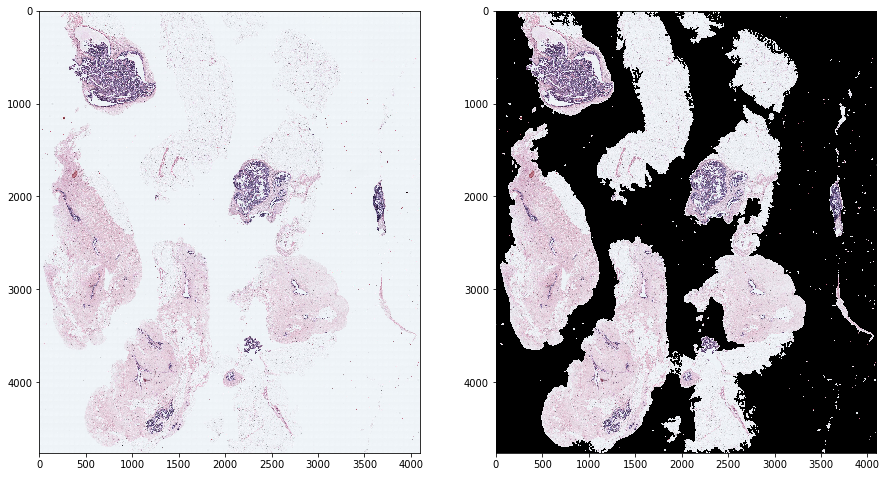

In [25]:
aux = pimObj.RGB.pim.copy()
aux[pimObj.FGmask.pmask == 0] = 0
plt.subplot(121)
pimObj.showRGB()
plt.subplot(122)
plt.imshow(aux)
plt.show()

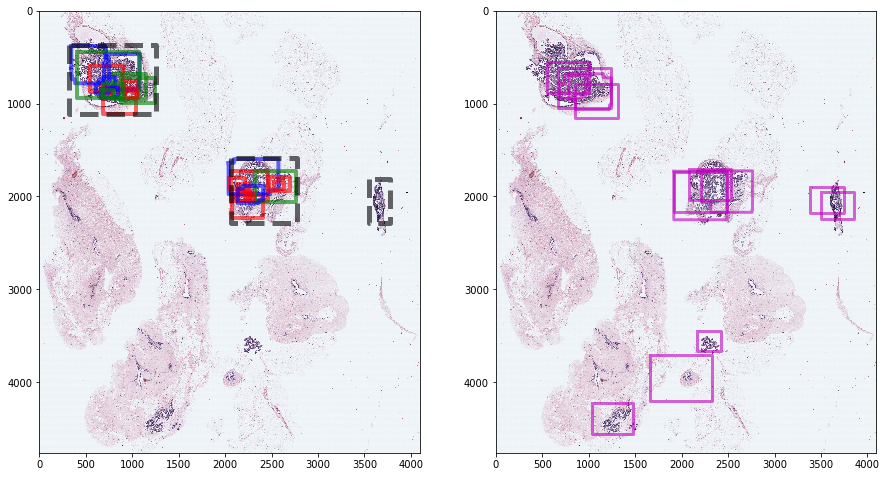

In [26]:
plt.subplot(121)
pimObj.showRGB()
pimObj.drawSoftROIs(expertID=[775,776,777], onlyEssentials=True)
pimObj.drawConsensusROIs()
# removed (not essential) polygons
plt.subplot(122)
pimObj.showRGB()
for softy in pimObj.SoftROIs:
    if not softy.isEssential:
        softy.draw(color='m', width=3)
plt.show()

In [27]:
numClasses = 4
for expID, expDiags in pimObj.ExpertDiagnoses.items():
    print(expDiags.toString(numClasses), ';', expDiags.diagnoses[numClasses])
print(pimObj.ConsensusDiagnoses.toString(numClasses), ';', pimObj.ConsensusDiagnoses.diagnoses[numClasses])

Expert775 Diagnoses: UDH, Atypical ; [1 1 0 0]
Expert776 Diagnoses: Atypical ; [0 1 0 0]
Expert777 Diagnoses: Atypical ; [0 1 0 0]
Consensus Diagnoses: UDH, Atypical ; [1 1 0 0]


In [28]:
print(pimObj.ConsensusDiagnoses.toString(14))
print(pimObj.ConsensusDiagnoses.diagnoses[14])

Consensus Diagnoses: UsualDuctalHyperplasia, AtypicalDuctalHyperplasia, IntraductalPapillomaWithAtypia
[0 0 0 1 0 0 0 0 1 1 0 0 0 0]


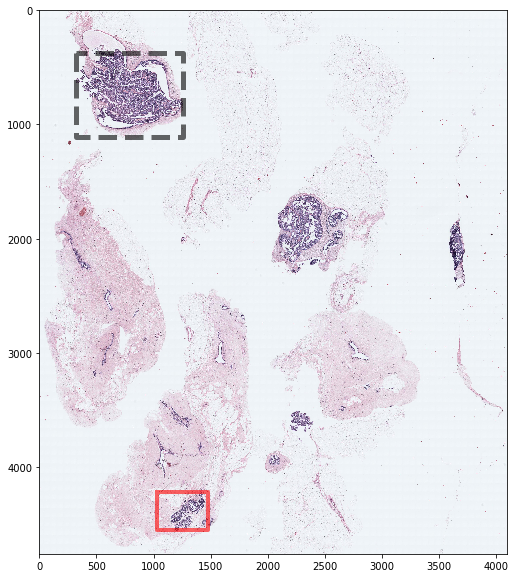

In [31]:
roi_idx = {'soft':2, 'cons':1}
softy = pimObj.SoftROIs[roi_idx['soft']]
consy = pimObj.ConsensusROIs[roi_idx['cons']]
pimObj.showRGB()
softy.draw()
consy.draw()
plt.show()

In [34]:
pim3Obj = PIM(pimObj.pimID, 3)
softy = pim3Obj.SoftROIs[roi_idx['soft']]
consy = pim3Obj.ConsensusROIs[roi_idx['cons']]
softy_rgb  = softy.readFrom(pim3Obj.HE.path)
softy_mask = softy.readFrom(pim3Obj.FGmask.path)
consy_rgb  = consy.readFrom(pim3Obj.HE.path)
consy_mask = consy.readFrom(pim3Obj.FGmask.path)

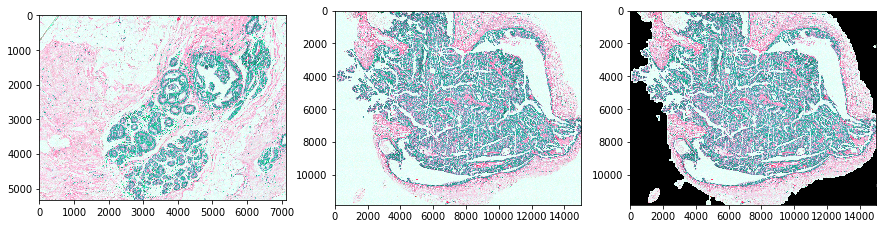

In [38]:
f, axs = plt.subplots(1, 3, sharey=False, sharex=False)
axs[0].imshow(softy_rgb,)
#axs[0].imshow(softy_mask, alpha=0.2)
axs[1].imshow(consy_rgb,)
#axs[1].imshow(consy_mask, alpha=0.2)
background = consy_mask == 0
consy_rgb[background] = 0
axs[2].imshow(consy_rgb)
plt.show()

In [39]:
patch_iter = {}
patch_iter['consensusROI'] = consy.crop(pim3Obj.HE.path, (224, 224), 250)
patch_iter['softROI']      = softy.crop(pim3Obj.HE.path, (224, 224), 250)

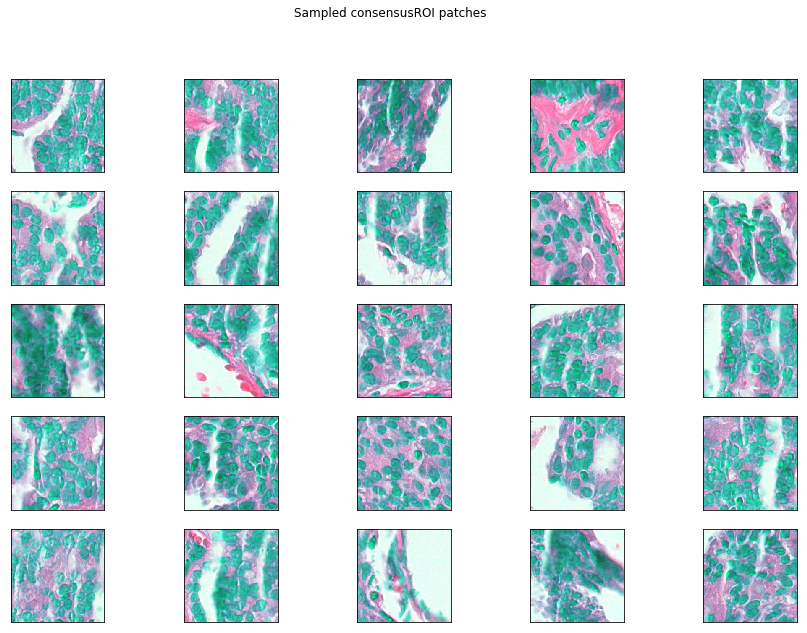

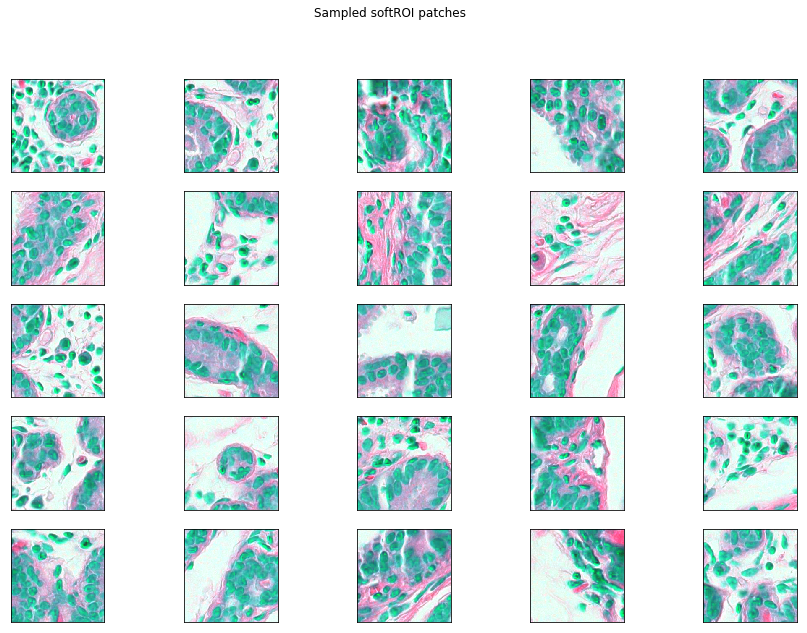

In [41]:
for k,p_iters in patch_iter.items():
    fig, axs_nd = plt.subplots(5, 5)
    for ax_arr in axs_nd:
        for ax in ax_arr:
            ax.imshow(next(patch_iter[k]))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.suptitle(f'Sampled {k} patches')
    plt.show()